# Run the whole deltas algorithm

In [15]:
%load_ext autoreload
%autoreload 2

from deltas.pipeline import data, classifier, evaluation
from deltas.model import downsample

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Get data

In [16]:
N1 = 9990
N2 = 10
data_clf = data.get_non_sep_data(
    N1=N1,
    N2=N2,
    scale=True)

## Get Classifier

clf


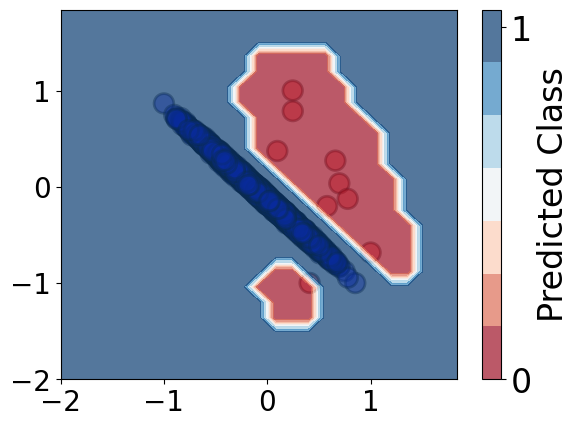

SMOTE


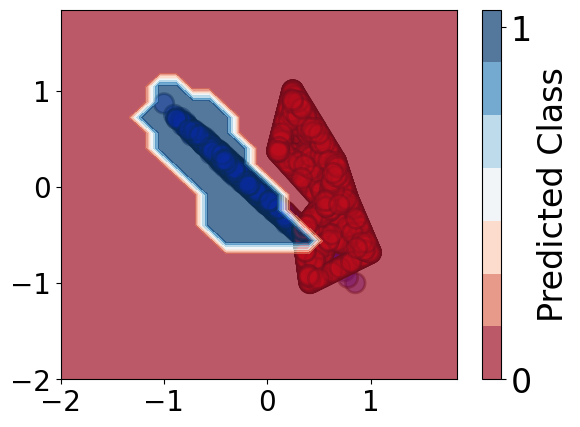

In [17]:
model = 'SVM-linear'
model = 'SVM-rbf'
# model = 'Linear'
# model = 'MLP'
data_clf['clf'], clf_SMOTE = classifier.get_classifier(
                      data_clf=data_clf,
                      model=model,
                      balance_clf=False)

## Fit deltas

Original Data


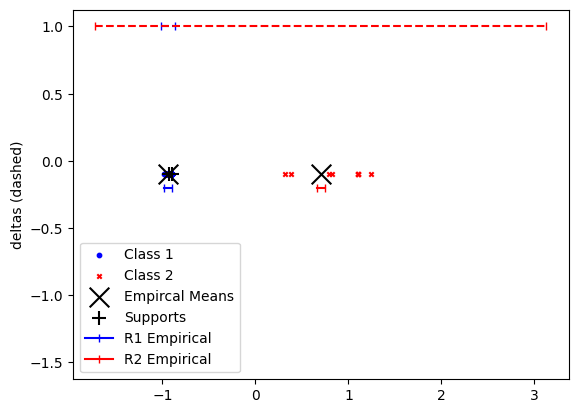

Budget 100 found 16 viable downsampled solutions
Best solution found by removing 4 data points
Downsampled Data:


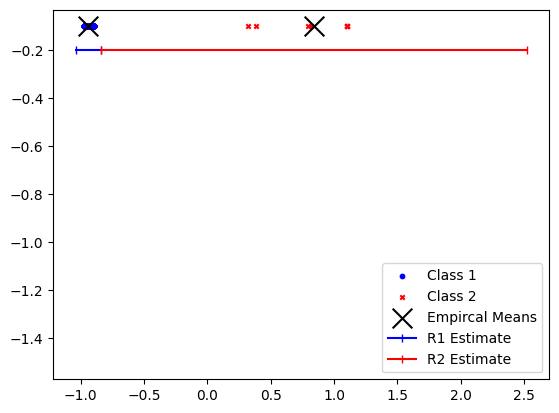

In [42]:
X = data_clf['data']['X']
y = data_clf['data']['y']
clf = data_clf['clf']
# deltas_model = model_deltas.reprojection_deltas(
deltas_model = downsample.downsample_deltas(clf).fit(X, y, alpha=1, _print=True, _plot=True, max_trials=100, method='supports', parallel=False)

## Show parameters

In [19]:
deltas_model.print_params()
deltas_model.print_deltas()

Parameters
                R:  1.1012127840628725
                N1: 9396
                N2: 8
                R1: 0.047320249912611634
                R2: 0.5180688172992174
                M:  1.2154751419037761
                D:  1.780864209115605
                C1: 1
                C2: 1
"
                  delta1: 0.0047995299529953 
                  delta2: 0.6258141954859983
                  constraint: -2.220446049250313e-16
                  


# Evaluation on test data

original accuracy: 0.80275
SMOTE accuracy: 0.95485
deltas accuracy: 0.9496

original F1: 0.7542821550918717
SMOTE F1: 0.9535326506458087
deltas F1: 0.9469250210614996

original precision0: 0.7171029042667623
SMOTE precision0: 0.9304438345793508
deltas precision0: 0.9084302325581395

original precision1: 1.0
SMOTE precision1: 0.9821901833987067
deltas precision1: 1.0

original


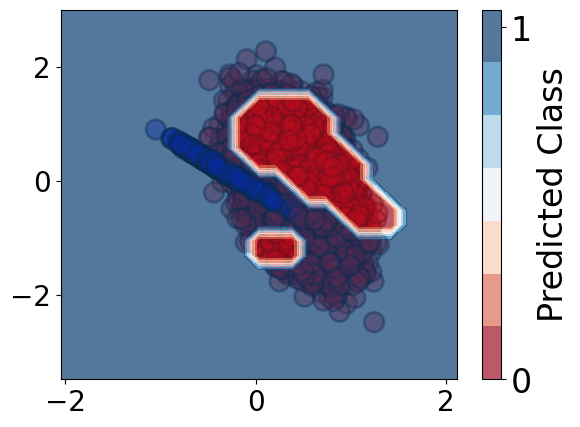

SMOTE


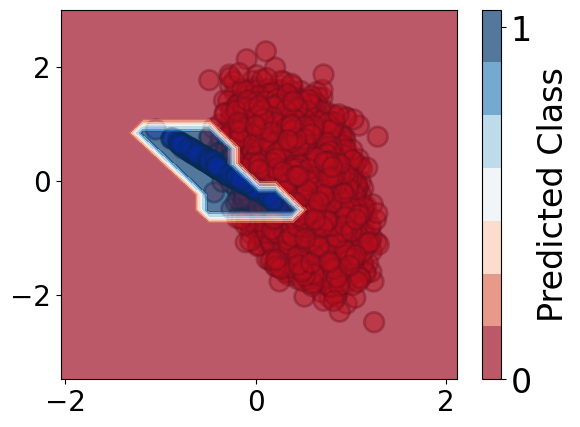

deltas


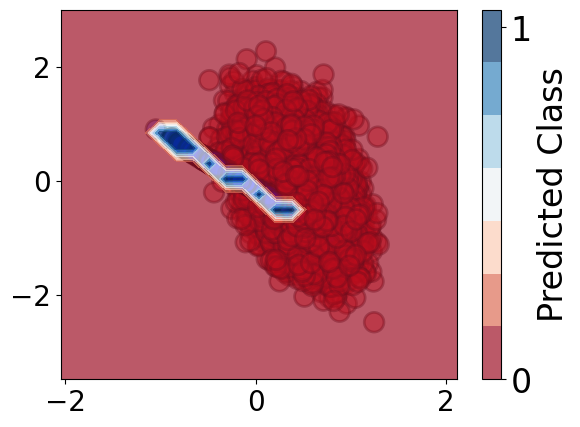

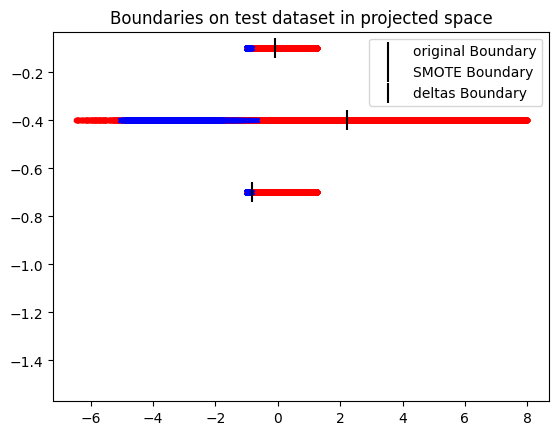

In [20]:
mdels = {'original': clf,
         'SMOTE': clf_SMOTE,
         'deltas': deltas_model}
evaluation.eval_test(mdels,
                       data_clf['data_test'], _print=True, _plot=True)